/tmp/ipykernel_57828/15891731.py:23: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  binary = closing(binary, square(3))  # Step 2: Noise removal


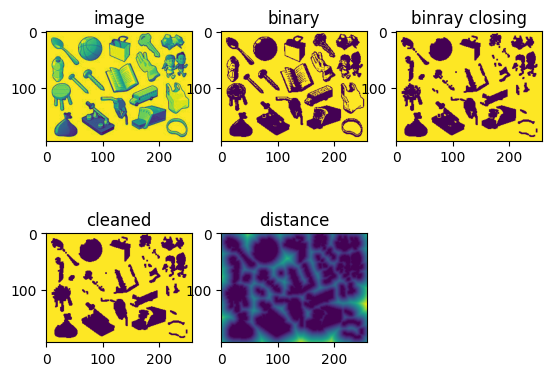

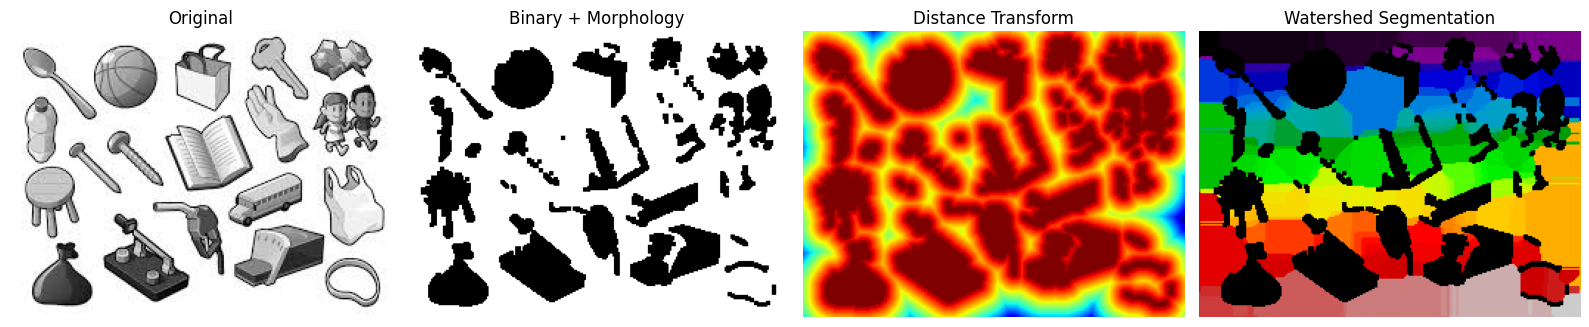

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.morphology import remove_small_objects, closing, square
from skimage.measure import label
import cv2


def watershed_segmentation(image_path):
    plt.figure()
    # Load and convert image to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(231)
    plt.imshow(image)
    plt.title("image")
    # Step 1: Thresholding (binary)
    binary = image > np.mean(image)  # or use Otsu's method
    plt.subplot(232)
    plt.imshow(binary)
    plt.title("binary")
    binary = closing(binary, square(3))  # Step 2: Noise removal
    plt.subplot(233)
    plt.imshow(binary)
    plt.title("binray closing")

    # Step 3: Remove small objects
    cleaned = remove_small_objects(binary, min_size=30)
    plt.subplot(234)
    plt.imshow(cleaned)
    plt.title("cleaned")
    # Step 4: Compute distance transform
    distance = ndi.distance_transform_edt(cleaned)
    plt.subplot(235)
    plt.imshow(distance)
    plt.title("distance")
    # Step 5: Detect local maxima (markers)
    coords = peak_local_max(distance, labels=cleaned, footprint=np.ones((3, 3)))

    # Create a mask (marker image) from the coordinates
    local_maxi = np.zeros_like(distance, dtype=bool)
    local_maxi[tuple(coords.T)] = True

    markers = label(local_maxi)

    # Step 6: Apply Watershed
    labels_ws = watershed(-distance, markers, mask=cleaned)

    # Visualize the results
    fig, axes = plt.subplots(1, 4, figsize=(16, 5))
    ax = axes.ravel()

    ax[0].imshow(image, cmap="gray")
    ax[0].set_title("Original")

    ax[1].imshow(cleaned, cmap="gray")
    ax[1].set_title("Binary + Morphology")

    ax[2].imshow(-distance, cmap="jet")
    ax[2].set_title("Distance Transform")

    ax[3].imshow(labels_ws, cmap="nipy_spectral")
    ax[3].set_title("Watershed Segmentation")

    for a in ax:
        a.axis("off")

    plt.tight_layout()
    plt.show()

    return labels_ws


# Example usage
if __name__ == "__main__":
    watershed_segmentation("stdimgs/objects.jpeg")